In [8]:
import shap
from new_plot import *
from utils_hardness import *
import pandas as pd
import numpy as np
set_things()
set_font()

In [2]:
#######################################################################
#  if values are stored in a different folder,                        #
#  kindly input the full path while loading. Default path:shap_data   #
#######################################################################
explainer = load_explainer()
shap_values = load_shap_values()
values = load_values()
features = load_featuers()

<h3>SHAP summary plot: bar

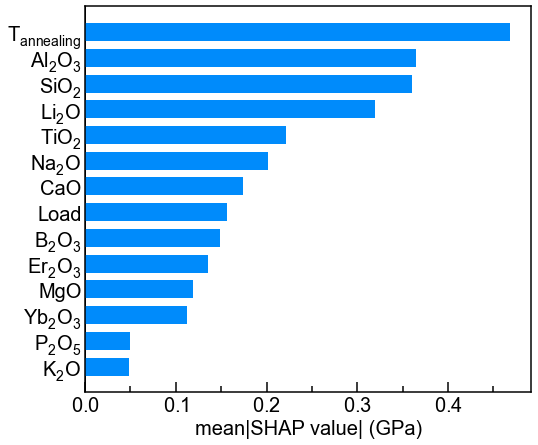

In [3]:
fig,ax = plt.subplots(figsize=(6,6))
shap.summary_plot(shap_values, values,feature_names=features,plot_type='bar',show=False)
plt.xlabel('mean|SHAP value| (GPa)')
# plt.savefig('bar_plot.png',dpi=1200,bbox_inches='tight')
plt.show()

<h2>SHAP summary plot: violin

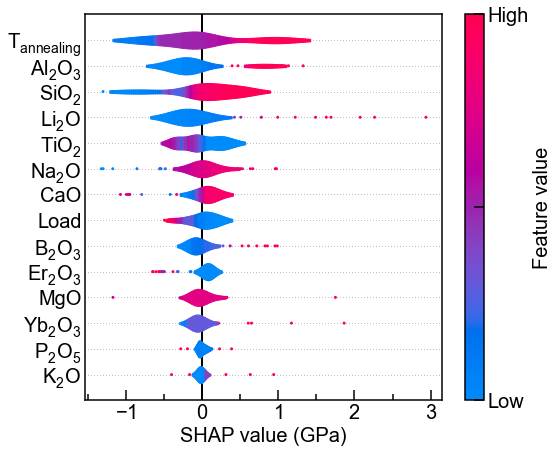

In [4]:
fig,ax = plt.subplots(figsize=(6,6))

shap.summary_plot(shap_values, values,feature_names=features,plot_type='violin',show=False,
                 color_bar=False)
plt.xlabel('SHAP value (GPa)')
cbar = plt.colorbar()
cbar.set_label('Feature value')
cbar.minorticks_off()
# cbar.ax.set_axis_off()
midpoint_cbar = (cbar.vmax+cbar.vmin)/2
cbar.set_ticks([cbar.vmax,midpoint_cbar,cbar.vmin])#,labels=['High','Low'])
cbar.set_ticklabels(['High','','Low'])
# plt.savefig('violin_plot.png',dpi=1200,bbox_inches='tight')
plt.show()

<h2>SHAP riverflow plot

In [5]:
df_sv = pd.DataFrame(data = shap_values, columns=features) 

#converting the column names into descending order of their mean abs sv
descending_order = list(df_sv.abs().mean(axis=0).sort_values(ascending=False).index)

#for river plot
river_sv = df_sv[descending_order[::-1]]
expected_value = explainer.expected_value

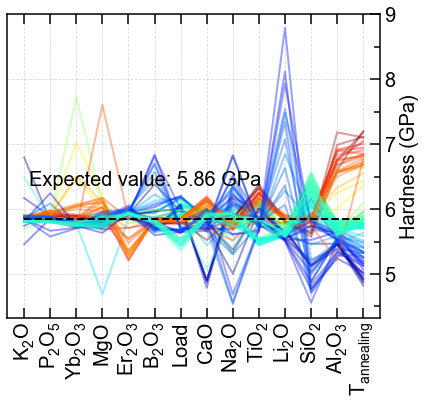

In [6]:
import matplotlib

fig,ax = plt.subplots(figsize=(6,6))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)
ax.yaxis.set_ticks_position("right")
ax.yaxis.set_label_position("right")

cmap = matplotlib.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=np.min(river_sv.values[:,-1]), vmax=np.max(river_sv.values[:,-1]))
for i in range(len(river_sv)):
    plt.plot(river_sv.values[i].T+expected_value, alpha=0.4, c=cmap(norm(river_sv.values[i,-1])))
plt.plot([0,len(descending_order)-1],[expected_value,expected_value],'k--',linewidth=2.0)

plt.xticks(range(len(descending_order)), labels=list(descending_order[::-1]), size=20, rotation=90)
plt.tight_layout()
plt.text(0.2, expected_value+0.5, r'Expected value: %.2f GPa'%(expected_value), fontsize=20, fontweight='normal')
plt.grid('on', color="gray", ls="--", which="major", alpha=0.3)
plt.ylabel('Hardness (GPa)')
plt.savefig('riverflow.png',dpi=1200,bbox_inches='tight')
plt.show()